# **Project:** Customer Segments

## Getting Started

In this project, we will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). 

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, we will be exploring the data through visualizations and code to understand how each feature is related to the others. 

The dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [4]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [17]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [50, 12, 27, 4]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6269,1095,1980,3860,609,2162
1,31714,12319,11757,287,3881,2931
2,14276,803,3045,485,100,518
3,22615,5410,7198,3915,1777,5185


 used the pandas 'sample' function to find three customers that vary significantly. The three customers chosen could belong to the following type of establishments:

Customer 0: This could be a cafe. One of the reasons for this is that it's consumption of 'Fresh', 'Frozen' and 'Delicatessen' items is much higher than the mean of the respective products and even reaches the top 25%. However, it's consumption of 'Milk', 'Grocery' and 'Detergents_Paper' is lower than the mean of these products and around the 50% mark. This means that this establishment uses various items to prepare fast food, which mostly requires fresh food items, along with frozen and delicatessen items for special food items like desserts. Also, since this establishment purchases large amounts of 'Frozen' items, so dessert items might be part of the main menu as opposed to the menu of a restaurant where dessert items are eaten at the end and in much smaller quantities than at a cafe.
Customer 1: This could be a grocery store. One of the reasons for this is that it's consumption of 'Milk', 'Grocery' and 'Detergents_Paper' items is much higher than the mean of the respective products and even reaches the top 25% (in case of 'Grocery' items, it almost reaches the top 25%). On the other hand, it's consumption of 'Fresh', 'Frozen' and 'Delicatessen' items is much lower than the mean of the respective products. So, this establishment stores larger amounts of various items that people purchase during grocery shopping.
Customer 2: This could be a restaurant. One of the reasons for this is that it's consumption of 'Fresh' and 'Delicatessen' items is much higher than the mean of the respective products and even reaches the top 25%. It's consumption of 'Frozen' items is lower than the mean but it is still in the 50% to 75% mark. However, it's consumption of 'Milk' and 'Grocery' items is lower than the mean of these products and even reaches the bottom 25%. It's consumption of 'Detergents_Paper' items is also lower than the mean but it is still in between the 25% and 50% mark. Again, this means that this establishment uses various items to prepare food, which mostly requires fresh food items, along with frozen and delicatessen items for special food items desserts. Also, since this establishment purchases large amounts of 'Fresh' items, so it might be preparing lunch and dinner items as opposed to fast food items.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

Implementing the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.model_selection.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [33]:
#Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Detergents_Paper', axis=1)
# Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data, data['Detergents_Paper'], test_size=0.25, random_state=1)

# Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=1)
regressor.fit(X_train, y_train.values)

# Report the score of the prediction using the testing set
from sklearn.metrics import r2_score
score = r2_score(y_test, regressor.predict(X_test))
score

0.8152412791948308

I attempted to predict the feature: 'Detergents_Paper'.

The reported prediction score was '0.88617'.

This feature can be safely dropped because it can be easily predicted from the remaining features. So, this feature is not necessary for identifying customers' spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

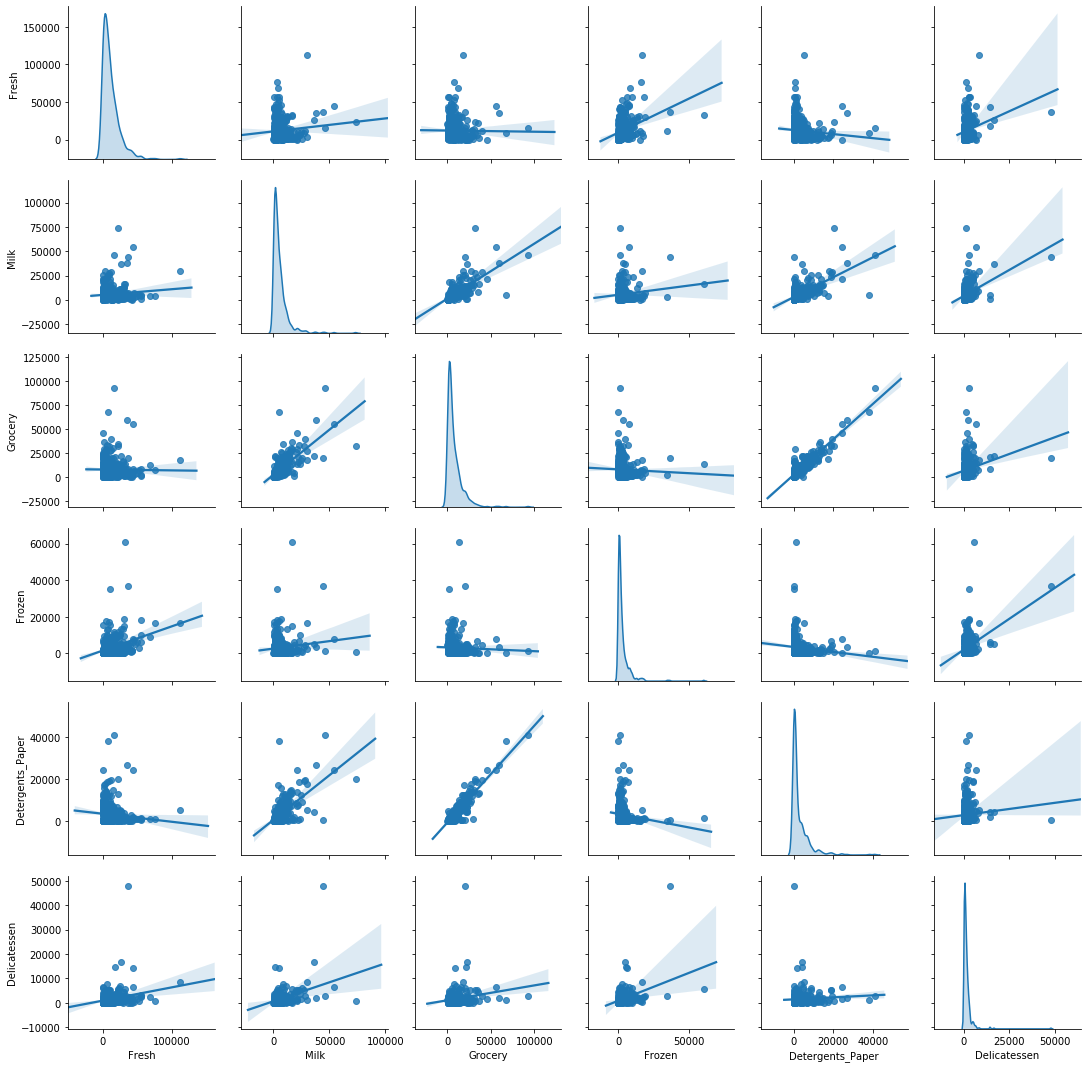

In [40]:
# Produce a scatter matrix for each pair of features in the data
import seaborn as sns
sns.pairplot(data, kind='reg', diag_kind='kde')

There is some degree of correlation between the 'Grocery' and 'Detergents_Paper' features. These two features exhibit positive correlation.

It confirms my suspicion that 'Detergents_Paper' feature can be predicted from the 'Grocery' feature.

The data of these features is not normally distributed. This is because most of the data points do not lie around any point of central tendency. Most of the data points are present near the origin and the median falls below than the mean, making this distribution positively skewed. Most of these points are on a line that passes through the origin of the axes of these two features and the value of the points of one feature increases in value as the value of the points of the other feature increases.

Based on the scatter plot, it seems that there are many outliers for most of the features.

## Data Preprocessing
In this section, we will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

Implementing the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

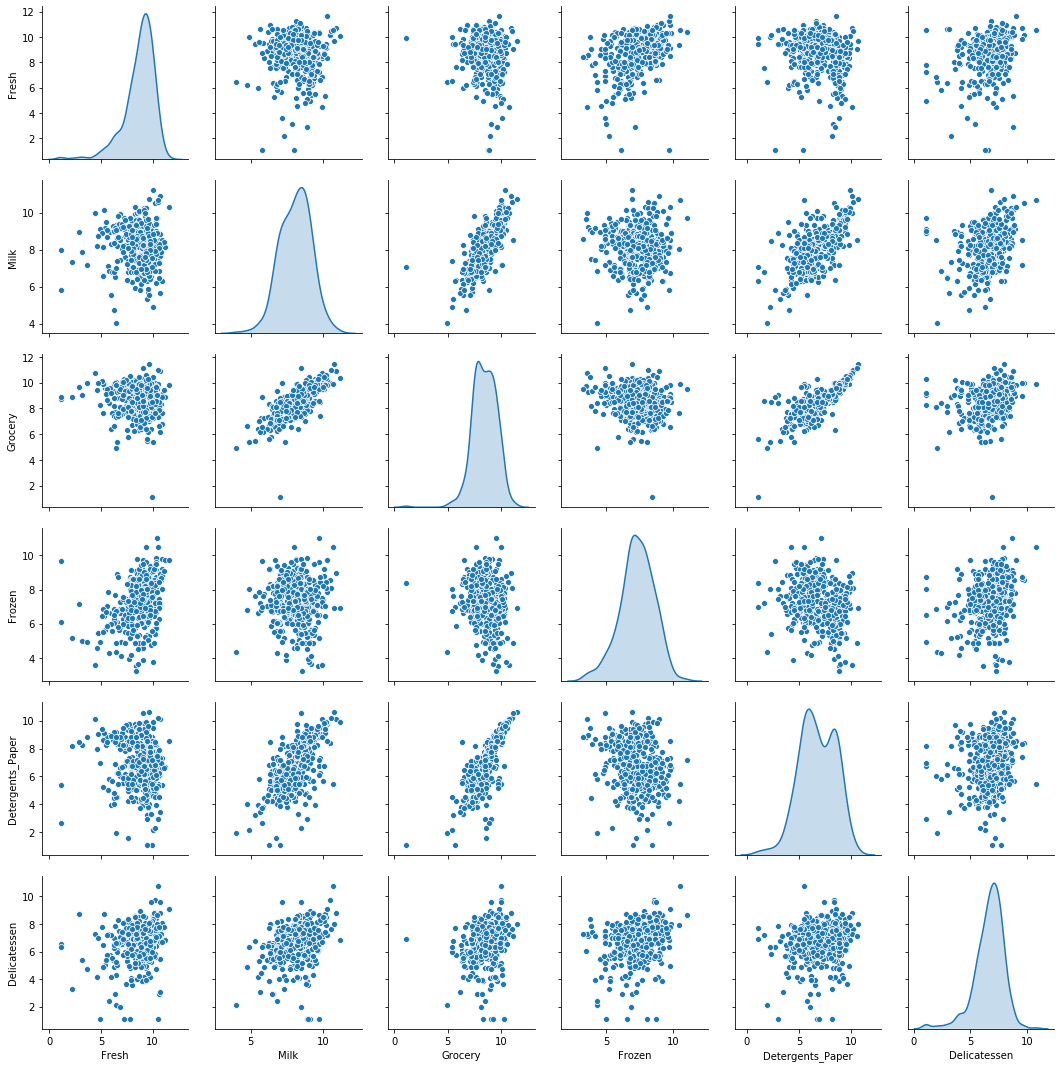

In [43]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
sns.pairplot(log_data, diag_kind='kde')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).



In [44]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.743372,6.998510,7.590852,8.258422,6.411818,7.678789
1,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099
2,9.566335,6.688355,8.021256,6.184149,4.605170,6.249975
3,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

Implementing the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If we choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once we have performed this implementation, the dataset will be stored in the variable `good_data`.

In [50]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],  25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65, 66, 75, 128, 154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


There are data points that are considered outliers for more than one feature.

An outlier may result from a variation in measurement or error. If the outlier is a result of an error in measurement, then it should be dropped. However, if an outlier is a result of variation in the measurement, then the outlier can be dropped if it does not affect the assumptions or the results of the model.

Some of these data points should be removed from the dataset. These outliers are customers that do not fall into any one of the known categories of customers. Thus, this data will not fit well into any of the categories learned by the unsupervised learning model, causing the model to provide incorrect information about the categories of customers.

Five data points were removed from the dataset because these points were detected as outliers in at least two different features out of the six features being considered. If these data points were outliers in just one feature, then it could have been attributed to the fact that these customers might have received big orders from their customers sometimes, resulting in more purchases from the distributor. However, since these data points are outliers in at least two features, these data points cannot be attributed to chance and should be removed from the dataset.

## Feature Transformation
In this section we will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

Implementing the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

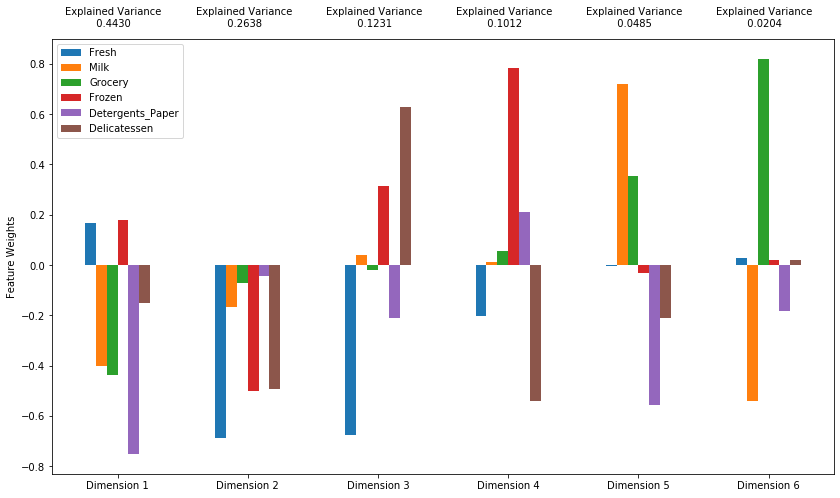

In [57]:
# Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples=pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

The total explained variance in the first and second principal components is '0.7068'.

The total explained variance in the first four principal components is '0.9311'.

So, around 71% of the variation in the data can be explained using the first two principal components (dimensions) and around 93% of the variation in the data can be explained using the first four principal components. So, these four principal components can be used together to summarize around 93% of the variation in the data of six features.

There are certain trends that can be explained by looking at the first four principal components:

- Dimension 1: A significant amount of negative weight is placed on 'Detergents_Paper' items and a meaningful amount of negative weight is placed on 'Grocery' and 'Milk' products. There are small positive weights on 'Fresh' and 'Frozen' items and a small negative weight on 'Delicatessen' products. This dimension is best categorized by customer spending on retail goods where most customers purchase small amounts of retail goods.

- Dimension 2: A significant amount of negative weight is placed on 'Fresh' items and a meaningful amount of negative weight is placed on both 'Frozen' and 'Delicatessen' products. There is a small negative weight on 'Milk' items. The amount of negative weights on 'Grocery' and 'Detergents_Paper' items is almost negligible. This dimension is best categorized by customer spending on non-retail goods which are directly consumed by the customer (for preparing food items in a restaurant etc.) where most customers purchase small amounts of non-retail goods.

- Dimension 3: A significant amount of negative weight is placed on 'Fresh' items and a significant amount of positive weight is placed on 'Delicatessen' items. A meaningful amount of positive weight is placed on 'Frozen' items. A small amount of negative weight is placed on 'Detergents_Paper' products. The amount of positive weight on 'Milk' items and amount of negative weight on 'Grocery' items is almost negligible. This dimension is best categorized by customer spending on non-retail goods which are directly consumed by the customer (for preparing food items in a cafe etc.) where most customers purchase large amounts of 'Delicatessen' goods and most customers purchase small amounts of 'Fresh' goods.

- Dimension 4: A significant amount of positive weight is placed on 'Frozen' items and a meaningful amount of negative weight is placed on 'Delicatessen' items. A small amount of negative weight is placed on 'Fresh' items and a small amount of positive weight is placed on 'Detergents_Paper' products. The amount of positive weights on 'Milk' items and 'Grocery' items is almost negligible. This dimension is best categorized by customer spending on non-retail goods which are directly consumed by the customer (for preparing food items in a cafe etc.) where most customers purchase large amounts of 'Frozen' goods and most customers purchase small amounts of 'Delicatessen' goods.

    So, in summary, it seems that most of the customers purchase small quantities of non-retail goods. These non-retail goods are not stored for long period of time. In fact, these non-retail goods are consumed quickly because their shelf-life is short. As such, these products need to be delivered almost on a daily basis.

### Observation
See how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [59]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.1404,-0.6710,0.9823,0.0603,-1.1423,0.0055
1,-2.2406,-1.2419,-1.0729,-1.9589,0.2160,-0.1782
2,2.4162,0.6069,-0.7652,-1.3209,0.1614,0.8089
3,-0.7848,-2.3943,0.4798,-0.3483,-0.3191,0.0613


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

Implementing the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [60]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
See how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [61]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.1404,-0.6710
1,-2.2406,-1.2419
2,2.4162,0.6069
3,-0.7848,-2.3943


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.



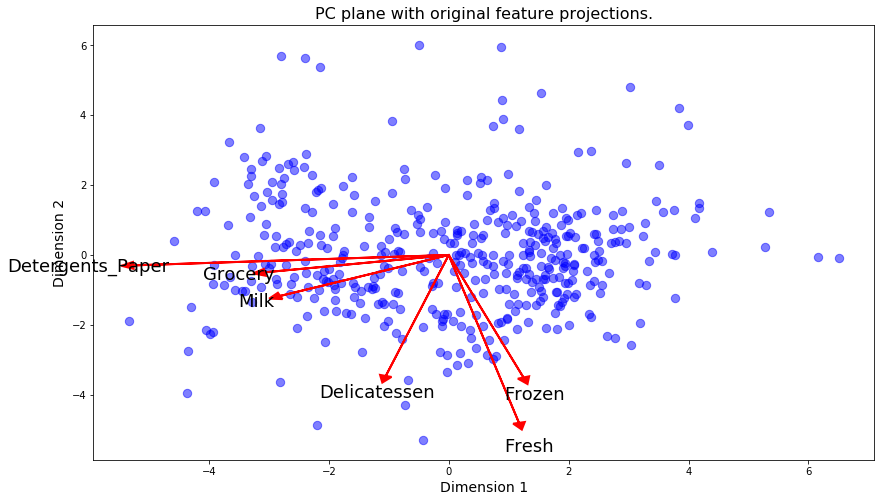

In [62]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 



## Clustering

In this section, we will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

Advantages of K-Means clustering:

  - It is computationally fast and efficient.
  - It is simple and easy to implement and easy to interpret the results.
  - It gives the best result when the data is well separated from one another.
  - Even if the data is not well separated, K-Means can still be used an inexpensive pre-clustering step because it converges quickly to a local minima.

Advantages of Gaussian Mixture Model:

  - It is flexible in terms of cluster covarianc`e where the shape of the distribution of the cluster is not constrained to a sphere.
  - It allows for mixed membership of data where one data point can have different degrees of membership to multiple clusters.
  - It works well with Gaussian distributions.

Based on the statistics collected earlier like the mean, standard deviation, the outliers and the shape of the distribution of each feature, the features seems to have a spherical shape. Also, we are interested in hard-clustering where each data point belongs to only one cluster. This will help us later to decide which of the two delivery schemes is preferred by a customer. So, I will use the K-means clustering algorithm for this given problem.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

Implementing the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [67]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, random_state=1)
clusterer.fit(reduced_data)

# TPredict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.cluster_centers_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print('Score: {}'.format(score))

Score: 0.42628101546910835


The result for the various cluster numbers that I tried are:

  - Score for 2 clusters using a Gaussian Mixture model: 0.422324682646
  - Score for 2 clusters using a KMeans model: 0.426281015469
  - Score for 3 clusters using a Gaussian Mixture model: 0.403182399695
  - Score for 3 clusters using a KMeans model: 0.397138208845
  - Score for 4 clusters using a Gaussian Mixture model: 0.301233518414
  - Score for 4 clusters using a KMeans model: 0.331256525802
  - Score for 5 clusters using a Gaussian Mixture model: 0.331773704404
  - Score for 5 clusters using a KMeans model: 0.350990778931
  - Score for 6 clusters using a Gaussian Mixture model: 0.334375554194
  - Score for 6 clusters using a KMeans model: 0.361868754295
The score for 2 clusters using KMeans clustering technique gave the best silhouette score of '0.4263'.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

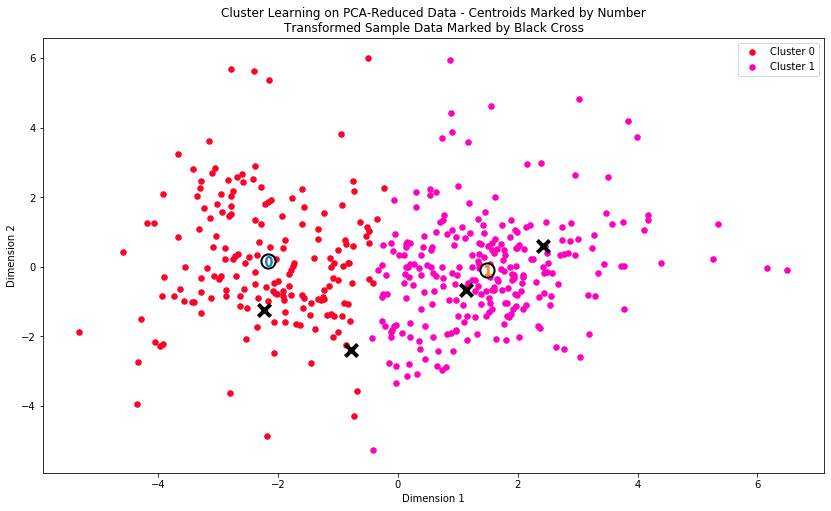

In [68]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

Implementing the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [69]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0


A customer who is assigned to 'Cluster 0' should best identify with the establishments represented by the feature set of 'Segment 1'. These establishments could be grocers and retail stores. The reason for this is indicated by the higher amount of the total purchase cost of the 'Milk', 'Grocery' and 'Detergents_Paper' product categories, which is higher than the mean of the respective products and even reaches the top 25%.

A customer who is assigned to 'Cluster 1' should best identify with the establishments represented by the feature set of 'Segment 0'. These establishments could be restaurants and cafes. The reason for this is indicated by the higher amount of the total purchase cost of the 'Fresh' and 'Frozen' product categories, which may be lower than the mean of the respective products but still reaches the top 50%. Also, the total purchase cost of the 'Delicatessen' product category is also lower than the mean and in the 25% to 50% marks

In [70]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1
Sample point 3 predicted to be in Cluster 0


## Conclusion

In this final section, we will investigate ways that we can make use of the clustered data. First, we will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, we will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, we will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

An A/B test consists of a control version (like the current 5 days a week delivery service) and a treatment version (like the proposed 3 days a week delivery service). Based on the previous clusters, the A/B test needs to be performed in a manner such that some portion of customers from both segments (both retail and restaurant) experience the control as well the treatment.

So, the delivery service should be changed for some customers from cluster 0 as well as for some customers from cluster 1. This will allow the wholesale distributor to determine which cluster's customers would react positively to the change in delivery service and which cluster's customers would react negatively to the same change.

The task of classifying a new customer, using their estimated product spending, to a customer segment can be achieved using a supervised learning model where the estimated product spendings are the features of the dataset and the customer segment is the target variable. This will help to classify to a cluster and help to decide which delivery scheme would suite this new customer.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

See how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

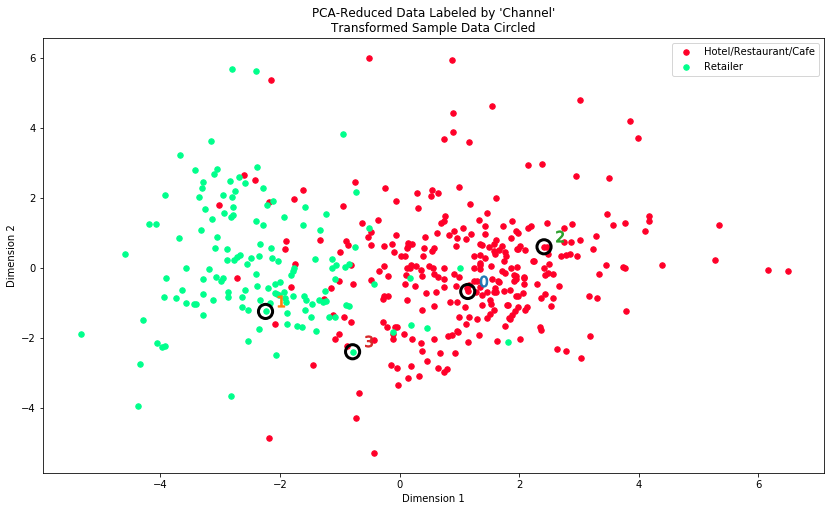

In [73]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

The clustering algorithm of K-means with 2 clusters compares as follows with this distribution of Hotel / Restaurant / Cafe and Retail customers:

Cluster 0 corresponds to Hotel / Restaurant / Cafe customers
Cluster 1 corresponds to Retail customers
Yes, there are customer segments which are classified as purely 'Retailers' or 'Hotel / Restaurant / Cafe' by this distribution. This is evident by the parts of the distribution that are predominantly 'Retailers' or 'Hotel / Restaurant / Cafe' in colour. However, there are some data points which are classified as being 'Retailer' even though they lie in an area that has more 'Hotel / Restaurant / Cafe' than 'Retailer' points.

Yes, these classifications are consistent with my previous definition of a customer segment where customers '0' and '2' are classified as being 'Hotel / Restaurant / Cafe' and customer '1' is classified as being a 'Retailer'.